In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Extração do arquivo

In [4]:
df = pd.read_csv('/content/df_TelecomX2.csv')
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,Total.Day,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.20,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,2.01,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.34,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.17,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.97,83.9,267.40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   objec

In [6]:
df.isnull().sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [7]:
# trocando o nome das colunas

df = df.rename (columns= {
    'customerID': 'ID_cliente',
    'Churn': 'cancelamento',
    'customer.gender': 'sexo',
    'customer.SeniorCitizen': 'idade_senior',
    'customer.Partner': 'possui_parceiro',
    'customer.Dependents': 'possui_dependentes',
    'customer.tenure': 'meses_contrato',
    'phone.PhoneService': 'possui_telefone',
    'phone.MultipleLines': 'duas_linhas',
    'internet.InternetService': 'possui_internet',
    'internet.OnlineSecurity': 'seguranca_online',
    'internet.OnlineBackup': 'backup_online',
    'internet.DeviceProtection': 'seguro_telefone',
    'internet.TechSupport': 'suporte_tecnico',
    'internet.StreamingTV': 'assinatura_TV',
    'internet.StreamingMovies': 'assinatura_filmes',
    'account.Contract': 'tipo_contrato',
    'account.PaperlessBilling': 'fatura_online',
    'account.PaymentMethod': 'forma_pagamento',
    'account.Charges.Monthly': 'servicos_mes',
    'account.Charges.Total': 'gastos_totais',
    'Total.Day': 'total_dia',
    })
df.head()

,ID_cliente,cancelamento,sexo,idade_senior,possui_parceiro,possui_dependentes,meses_contrato,possui_telefone,duas_linhas,possui_internet,...,seguro_telefone,suporte_tecnico,assinatura_TV,assinatura_filmes,tipo_contrato,fatura_online,forma_pagamento,total_dia,servicos_mes,gastos_totais
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.20,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,2.01,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.34,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.17,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.97,83.9,267.40


In [8]:
df.columns

Index(['ID_cliente', 'cancelamento', 'sexo', 'idade_senior', 'possui_parceiro',
       'possui_dependentes', 'meses_contrato', 'possui_telefone',
       'duas_linhas', 'possui_internet', 'seguranca_online', 'backup_online',
       'seguro_telefone', 'suporte_tecnico', 'assinatura_TV',
       'assinatura_filmes', 'tipo_contrato', 'fatura_online',
       'forma_pagamento', 'total_dia', 'servicos_mes', 'gastos_totais'],
      dtype='object')

# Preparação dos dados

##Remoção de colunas irrelevantes

In [9]:
#Limpando os dados

df = df.drop(columns=['ID_cliente'])
df.head()

,cancelamento,sexo,idade_senior,possui_parceiro,possui_dependentes,meses_contrato,possui_telefone,duas_linhas,possui_internet,seguranca_online,...,seguro_telefone,suporte_tecnico,assinatura_TV,assinatura_filmes,tipo_contrato,fatura_online,forma_pagamento,total_dia,servicos_mes,gastos_totais
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.20,65.6,593.30
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,2.01,59.9,542.40
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.34,73.9,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.17,98.0,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.97,83.9,267.40


In [10]:
df_clean = df.copy()

#Agrupar 'no internet service' com o 'no'
cols_to_fix = [
    'seguranca_online', 'backup_online', 'seguro_telefone', 'suporte_tecnico', 'assinatura_TV','assinatura_filmes'
]

for col in cols_to_fix:
    df_clean[col] = df_clean[col].replace({'No internet service': 'No'})

#One-hot encoding sem dummy trap

categorical_cols = ['cancelamento', 'sexo', 'possui_parceiro',
       'possui_dependentes', 'possui_telefone',
       'duas_linhas', 'possui_internet', 'seguranca_online', 'backup_online',
       'seguro_telefone', 'suporte_tecnico', 'assinatura_TV',
       'assinatura_filmes', 'tipo_contrato', 'fatura_online',
       'forma_pagamento'
]

df_encoded = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)
df_encoded.head()


,idade_senior,meses_contrato,total_dia,servicos_mes,gastos_totais,cancelamento_Yes,sexo_Male,possui_parceiro_Yes,possui_dependentes_Yes,possui_telefone_Yes,...,seguro_telefone_Yes,suporte_tecnico_Yes,assinatura_TV_Yes,assinatura_filmes_Yes,tipo_contrato_One year,tipo_contrato_Two year,fatura_online_Yes,forma_pagamento_Credit card (automatic),forma_pagamento_Electronic check,forma_pagamento_Mailed check
0,0,9,2.20,65.6,593.30,False,False,True,True,True,...,False,True,True,False,True,False,True,False,False,True
1,0,9,2.01,59.9,542.40,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,0,4,2.34,73.9,280.85,True,True,False,False,True,...,True,False,False,False,False,False,True,False,True,False
3,1,13,3.17,98.0,1237.85,True,True,True,False,True,...,True,False,True,True,False,False,True,False,True,False
4,1,3,2.97,83.9,267.40,True,False,True,False,True,...,False,True,True,False,False,False,True,False,False,True


# Encoding

In [11]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   idade_senior                             7043 non-null   int64  
 1   meses_contrato                           7043 non-null   int64  
 2   total_dia                                7032 non-null   float64
 3   servicos_mes                             7043 non-null   float64
 4   gastos_totais                            7032 non-null   float64
 5   cancelamento_Yes                         7043 non-null   bool   
 6   sexo_Male                                7043 non-null   bool   
 7   possui_parceiro_Yes                      7043 non-null   bool   
 8   possui_dependentes_Yes                   7043 non-null   bool   
 9   possui_telefone_Yes                      7043 non-null   bool   
 10  duas_linhas_No phone service             7043 no

In [12]:
df_encoded.isnull().sum()

,0
idade_senior,0
meses_contrato,0
total_dia,11
servicos_mes,0
gastos_totais,11
cancelamento_Yes,0
sexo_Male,0
possui_parceiro_Yes,0
possui_dependentes_Yes,0
possui_telefone_Yes,0


In [13]:
# Remover colunas com valores nulos

print(df_encoded[['total_dia', 'gastos_totais']].isnull().sum())


total_dia        11
gastos_totais    11
dtype: int64


In [14]:
df_encoded = df_encoded.dropna(subset=['total_dia', 'gastos_totais'])
df_encoded.isnull().sum()

,0
idade_senior,0
meses_contrato,0
total_dia,0
servicos_mes,0
gastos_totais,0
cancelamento_Yes,0
sexo_Male,0
possui_parceiro_Yes,0
possui_dependentes_Yes,0
possui_telefone_Yes,0


### Normalização/ Padronização

## Correlação entre as variáveis

In [15]:
corr = df_encoded.corr()


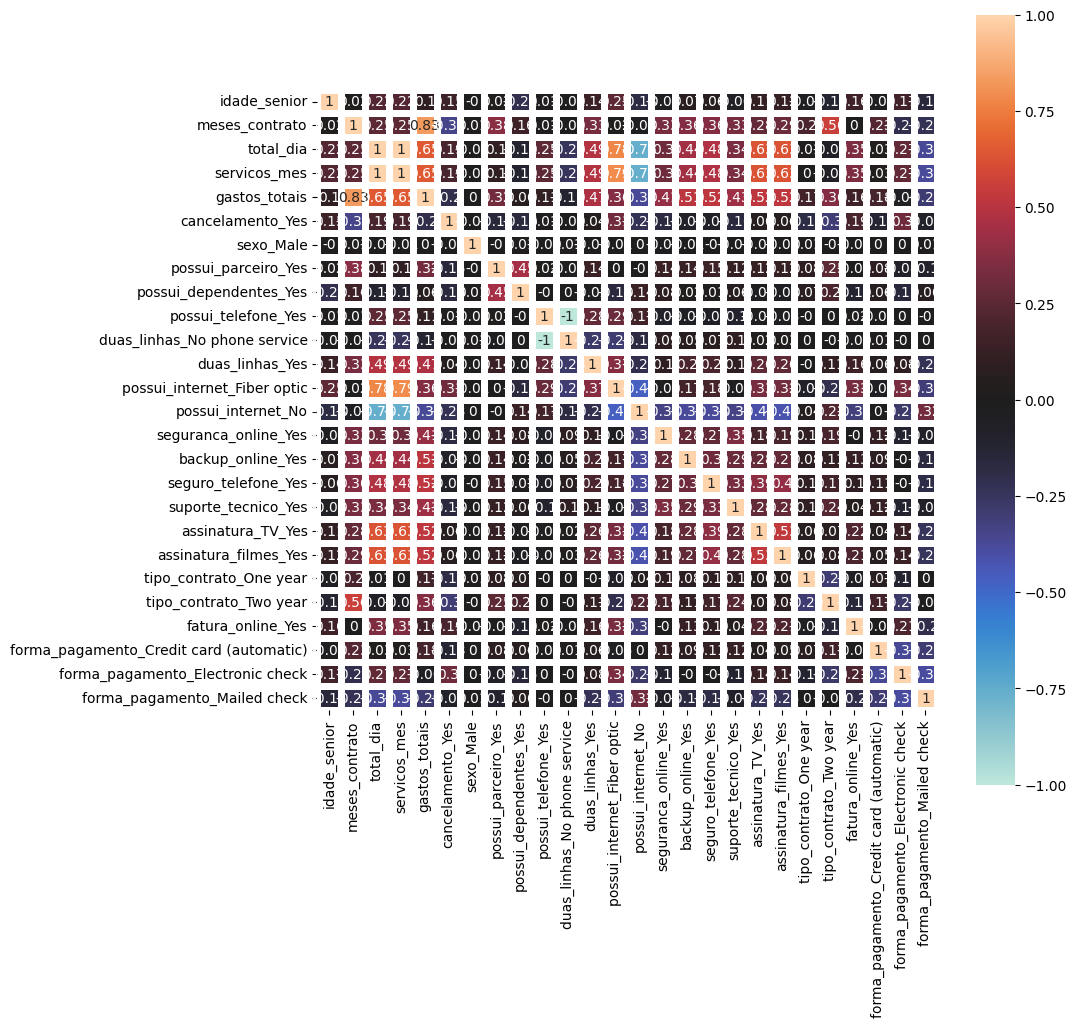

In [16]:
import numpy as np

fig, ax = plt.subplots(figsize = (10,20))
ax = sns.heatmap(np.round(corr,2), vmax=1, vmin=-1, center=0, square= True, linewidths= 5, annot= True, cbar_kws={'shrink': .5})
plt.show()


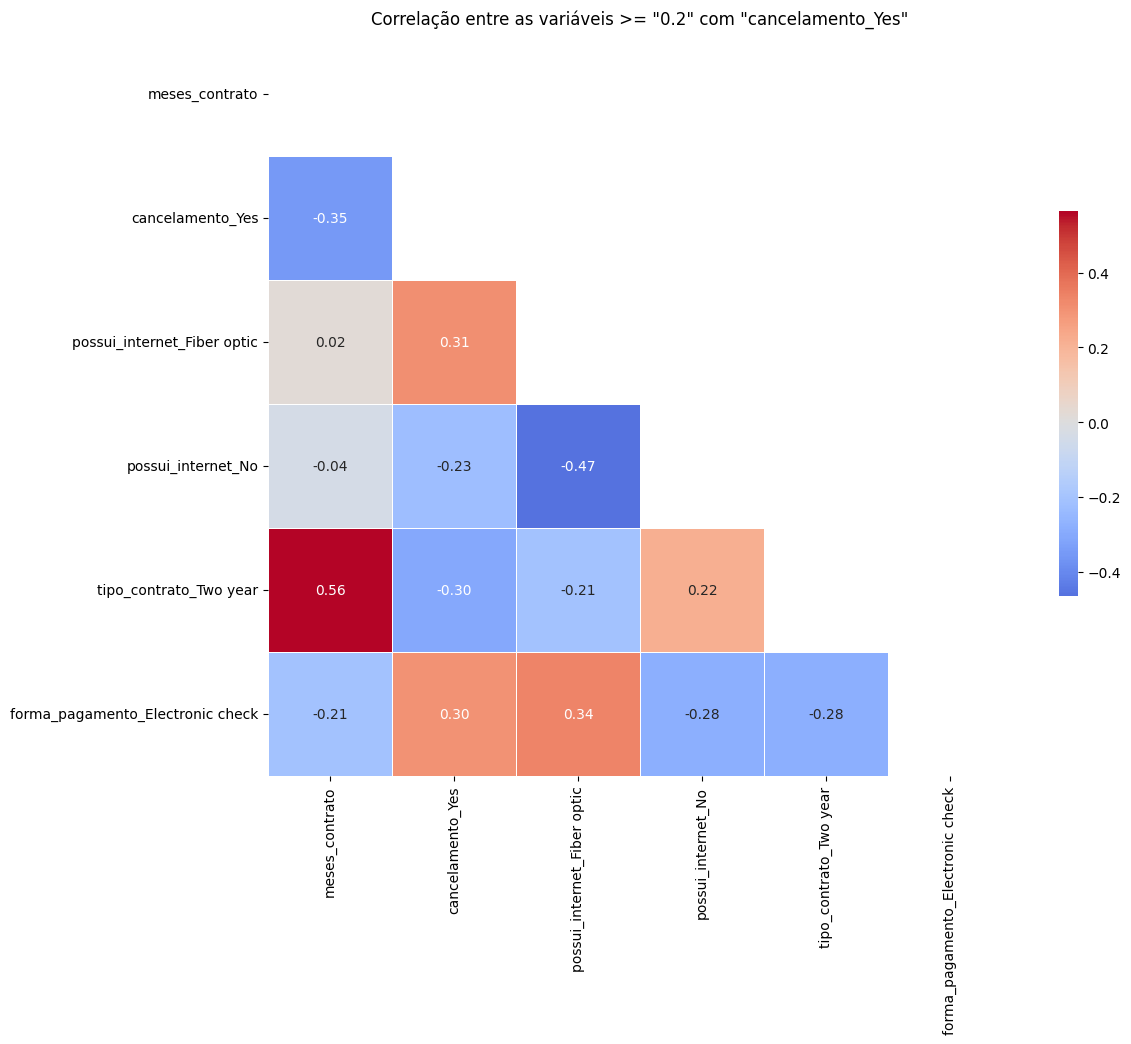

In [17]:
import seaborn as sns

target_var = 'cancelamento_Yes'

# mínimo da correlação absoluta para ser considerada significativa
limiar = 0.2

variaveis_relevantes = corr.index[abs(corr[target_var])>= limiar].tolist()

#garantindo que a variável alvo está na lista
if target_var not in variaveis_relevantes:
  variaveis_relevantes.append(target_var)

# criar uma matriz de correlação com as variáveis relevantes
corr_relevantes = corr.loc  [variaveis_relevantes, variaveis_relevantes]

# gerar máscara para esconder o triângulo superior da matrz
mascara = np.triu(np.ones_like(corr_relevantes, dtype=bool))

# plotar headmap

plt.figure(figsize=(12,10))
sns.heatmap(
    corr_relevantes,
    annot=True,
    fmt ='.2f',
    cmap='coolwarm',
    center = 0,
    square= True,
    linewidths= 0.5,
    cbar_kws = {'shrink': .5},
    mask= mascara
)
plt.title(f'Correlação entre as variáveis >= "{limiar}" com "{target_var}"')
plt.show()


## Análise de multicolinearidade

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools import add_constant

In [19]:
X = df_encoded.drop(columns=['cancelamento_Yes'])
X_const = add_constant(X)

In [20]:
X_const = X_const.astype(float)

# Calcular o VIF (análise da correlação entre as variáveis)
vif_data = pd.DataFrame()
vif_data['Variável'] = X_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# Exibir os resultados

display(vif_data.sort_values(by='VIF', ascending=False))

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Variável,VIF
9,possui_telefone_Yes,inf
10,duas_linhas_No phone service,inf
4,servicos_mes,992.623632
12,possui_internet_Fiber optic,148.504277
3,total_dia,133.792125
13,possui_internet_No,104.217179
19,assinatura_filmes_Yes,24.158588
18,assinatura_TV_Yes,24.080021
5,gastos_totais,10.871350
2,meses_contrato,7.613525


### Melhorando a FIV

In [21]:
import statsmodels.api as sm

X_filtered = X_const.copy()

## Remover variáveis com multicolinearidade perfeita: VIF = inf
cols_to_drop= ['possui_telefone_Yes', 'duas_linhas_No phone service' ]
X_filtered.drop(columns=cols_to_drop, inplace = True)

## Remover redundâncias fortes entre variáveis
X_filtered.drop(columns=['total_dia'], inplace = True)

## Remover redundâncias entre dummies da mesma variável categórica
X_filtered.drop (columns=['possui_internet_No'], inplace = True)

## Garantir que os dados estão em float
X_filtered = X_filtered.astype(float)

## Recalcular o VIF
vif_data = pd.DataFrame()
vif_data['Variável'] = X_filtered.columns
vif_data['VIF'] = [variance_inflation_factor(X_filtered.values, i) for i in range(X_filtered.shape[1])]

display(vif_data.sort_values(by='VIF', ascending=False))


,Variável,VIF
0,const,36.498367
3,servicos_mes,18.168780
4,gastos_totais,10.706800
2,meses_contrato,7.548716
9,possui_internet_Fiber optic,6.997820
17,tipo_contrato_Two year,2.532131
14,assinatura_TV_Yes,2.188547
15,assinatura_filmes_Yes,2.187888
20,forma_pagamento_Electronic check,1.967305
21,forma_pagamento_Mailed check,1.847752


In [22]:
X_filtered.drop(columns=['gastos_totais'], inplace = True)

## Recalcular o VIF
vif_data = pd.DataFrame()
vif_data['Variável'] = X_filtered.columns
vif_data['VIF'] = [variance_inflation_factor(X_filtered.values, i) for i in range(X_filtered.shape[1])]

display(vif_data.sort_values(by='VIF', ascending=False))

,Variável,VIF
0,const,29.602764
3,servicos_mes,17.283226
8,possui_internet_Fiber optic,6.936112
2,meses_contrato,2.826197
16,tipo_contrato_Two year,2.521228
13,assinatura_TV_Yes,2.166619
14,assinatura_filmes_Yes,2.163842
19,forma_pagamento_Electronic check,1.964004
20,forma_pagamento_Mailed check,1.825717
12,suporte_tecnico_Yes,1.712098


## Modelos preditivos

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [24]:
X = df_encoded.drop(columns=['cancelamento_Yes'])
y = df_encoded['cancelamento_Yes']

In [25]:
# Dividindo o conjunto de dados em treinamento e teste
##30% teste, 70% treino

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [26]:
## Normalizando

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
## Fazendo o balanceamento

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

### Modelo de regressão logística

In [28]:
# Com dados balanceados

lr = LogisticRegression(random_state=42)
lr.fit(X_train_resampled, y_train_resampled)

# Previsões
y_pred_lr = lr.predict(X_test_scaled)
y_proba_lr = lr.predict_proba(X_test_scaled)[:,1]

# Métricas
print('Regressão Logística')
print('Acurácia:', accuracy_score(y_test, y_pred_lr))
print('ROC AUC:', roc_auc_score(y_test, y_proba_lr))
print('Matriz de confusão:\n', confusion_matrix(y_test, y_pred_lr))
print('Relatório de classificação:\n', classification_report(y_test, y_pred_lr))

Regressão Logística
Acurácia: 0.7502369668246446
ROC AUC: 0.8453628296790868
Matriz de confusão:
 [[1129  420]
 [ 107  454]]
Relatório de classificação:
               precision    recall  f1-score   support

       False       0.91      0.73      0.81      1549
        True       0.52      0.81      0.63       561

    accuracy                           0.75      2110
   macro avg       0.72      0.77      0.72      2110
weighted avg       0.81      0.75      0.76      2110



In [34]:
# Com dados desbalanceados

lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

# Previsões
y_pred_lr = lr.predict(X_test_scaled)
y_proba_lr = lr.predict_proba(X_test_scaled)[:,1]

# Métricas
print('Regressão Logística')
print('Acurácia:', accuracy_score(y_test, y_pred_lr))
print('ROC AUC:', roc_auc_score(y_test, y_proba_lr))
print('Matriz de confusão:\n', confusion_matrix(y_test, y_pred_lr))
print('Relatório de classificação:\n', classification_report(y_test, y_pred_lr))

Regressão Logística
Acurácia: 0.7137440758293839
ROC AUC: 0.8069480741413299
Matriz de confusão:
 [[1058  491]
 [ 113  448]]
Relatório de classificação:
               precision    recall  f1-score   support

       False       0.90      0.68      0.78      1549
        True       0.48      0.80      0.60       561

    accuracy                           0.71      2110
   macro avg       0.69      0.74      0.69      2110
weighted avg       0.79      0.71      0.73      2110



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### Modelo Random forest

In [29]:
# Com dados balanceados

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_resampled, y_train_resampled)

# Previsões
y_pred_rf = rf.predict(X_test_scaled)
y_proba_rf = rf.predict_proba(X_test_scaled)[:,1]

# Métricas
print('Random Forest')
print('Acurácia:', accuracy_score(y_test, y_pred_rf))
print('ROC AUC:', roc_auc_score(y_test, y_proba_rf))
print('Matriz de confusão:\n', confusion_matrix(y_test, y_pred_rf))
print('Relatório de classificação:\n', classification_report(y_test, y_pred_rf))

Random Forest
Acurácia: 0.7786729857819905
ROC AUC: 0.8241588788810905
Matriz de confusão:
 [[1307  242]
 [ 225  336]]
Relatório de classificação:
               precision    recall  f1-score   support

       False       0.85      0.84      0.85      1549
        True       0.58      0.60      0.59       561

    accuracy                           0.78      2110
   macro avg       0.72      0.72      0.72      2110
weighted avg       0.78      0.78      0.78      2110



In [36]:
# Com dados desbalanceados

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Previsões
y_pred_rf = rf.predict(X_test_scaled)
y_proba_rf = rf.predict_proba(X_test_scaled)[:,1]

# Métricas
print('Random Forest')
print('Acurácia:', accuracy_score(y_test, y_pred_rf))
print('ROC AUC:', roc_auc_score(y_test, y_proba_rf))
print('Matriz de confusão:\n', confusion_matrix(y_test, y_pred_rf))
print('Relatório de classificação:\n', classification_report(y_test, y_pred_rf))

Random Forest
Acurácia: 0.7270142180094786
ROC AUC: 0.7733141616292035
Matriz de confusão:
 [[1120  429]
 [ 147  414]]
Relatório de classificação:
               precision    recall  f1-score   support

       False       0.88      0.72      0.80      1549
        True       0.49      0.74      0.59       561

    accuracy                           0.73      2110
   macro avg       0.69      0.73      0.69      2110
weighted avg       0.78      0.73      0.74      2110



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


### Modelo KNN

In [30]:
from sklearn.neighbors import KNeighborsClassifier

# KNN com dados balanceados
knn = KNeighborsClassifier()
knn.fit(X_train_resampled, y_train_resampled)

# Previsões
y_pred_knn = knn.predict(X_test_scaled)
y_proba_knn = knn.predict_proba(X_test_scaled)[:,1]

# Métricas
print('KNN')
print('Acurácia:', accuracy_score(y_test, y_pred_knn))
print('ROC AUC:', roc_auc_score(y_test, y_proba_knn))
print('Matriz de confusão:\n', confusion_matrix(y_test, y_pred_knn))
print('Relatório de classificação:\n', classification_report(y_test, y_pred_knn))

KNN
Acurácia: 0.6924170616113744
ROC AUC: 0.7539928583675973
Matriz de confusão:
 [[1048  501]
 [ 148  413]]
Relatório de classificação:
               precision    recall  f1-score   support

       False       0.88      0.68      0.76      1549
        True       0.45      0.74      0.56       561

    accuracy                           0.69      2110
   macro avg       0.66      0.71      0.66      2110
weighted avg       0.76      0.69      0.71      2110



In [31]:
# KNN com dados desbalanceados

knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

# Previsões
y_pred_knn = knn.predict(X_test_scaled)
y_proba_knn = knn.predict_proba(X_test_scaled)[:,1]

# Métricas
print('KNN')
print('Acurácia:', accuracy_score(y_test, y_pred_knn))
print('ROC AUC:', roc_auc_score(y_test, y_proba_knn))
print('Matriz de confusão:\n', confusion_matrix(y_test, y_pred_knn))
print('Relatório de classificação:\n', classification_report(y_test, y_pred_knn))

KNN
Acurácia: 0.7592417061611374
ROC AUC: 0.7727059836200458
Matriz de confusão:
 [[1310  239]
 [ 269  292]]
Relatório de classificação:
               precision    recall  f1-score   support

       False       0.83      0.85      0.84      1549
        True       0.55      0.52      0.53       561

    accuracy                           0.76      2110
   macro avg       0.69      0.68      0.69      2110
weighted avg       0.76      0.76      0.76      2110



## Modelo SVM

In [32]:
# SVM com dados balanceados
from sklearn.svm import SVC

svm = SVC(probability=True, random_state=42)
svm.fit(X_train_resampled, y_train_resampled)

# Previsões
y_pred_svm = svm.predict(X_test_scaled)
y_proba_svm = svm.predict_proba(X_test_scaled)[:,1]

# Métricas
print('SVM')
print('Acurácia:', accuracy_score(y_test, y_pred_svm))
print('ROC AUC:', roc_auc_score(y_test, y_proba_svm))
print('Matriz de confusão:\n', confusion_matrix(y_test, y_pred_svm))
print('Relatório de classificação:\n', classification_report(y_test, y_pred_svm))

SVM
Acurácia: 0.7563981042654029
ROC AUC: 0.8240115812743313
Matriz de confusão:
 [[1191  358]
 [ 156  405]]
Relatório de classificação:
               precision    recall  f1-score   support

       False       0.88      0.77      0.82      1549
        True       0.53      0.72      0.61       561

    accuracy                           0.76      2110
   macro avg       0.71      0.75      0.72      2110
weighted avg       0.79      0.76      0.77      2110



In [33]:
# SVM com dados desbalanceados

from sklearn.svm import SVC

svm = SVC(probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)

# Previsões
y_pred_svm = svm.predict(X_test_scaled)
y_proba_svm = svm.predict_proba(X_test_scaled)[:,1]

# Métricas
print('SVM')
print('Acurácia:', accuracy_score(y_test, y_pred_svm))
print('ROC AUC:', roc_auc_score(y_test, y_proba_svm))
print('Matriz de confusão:\n', confusion_matrix(y_test, y_pred_svm))
print('Relatório de classificação:\n', classification_report(y_test, y_pred_svm))

SVM
Acurácia: 0.7966824644549763
ROC AUC: 0.8062840841483608
Matriz de confusão:
 [[1407  142]
 [ 287  274]]
Relatório de classificação:
               precision    recall  f1-score   support

       False       0.83      0.91      0.87      1549
        True       0.66      0.49      0.56       561

    accuracy                           0.80      2110
   macro avg       0.74      0.70      0.71      2110
weighted avg       0.78      0.80      0.79      2110



# Relatório final: Telecom X

## Preparação dos dados

Foi removida a coluna ID_cliente que era irrelevante para análise.

Para as variáveis  'seguranca_online', 'backup_online', 'seguro_telefone', 'suporte_tecnico', 'assinatura_TV','assinatura_filmes' a catagoria 'No internet service' foi agrupada em 'no', e então para dar seguimento foi feito o encoding das variáveis pelo One-Hot-Encoding e removidas as colunas com valores nulos.




## Análise de multicolinearidade

Após realizar a análise de correlação entre as variáveis foi identificado que as variáveis a seguir possuiam um alto índice de correlação, e por esse motivo foram desconsideradas para o estudo.


*   possui_telefone_Yes' e 'duas_linhas_No phone service' com multicolinearidade perfeira.
*   'total_dia' com redundância, já que foi uma coluna criada a partir de outras duas.
*   'possui_internet_No' com redundâncias entre dummies da mesma variável categórica.

## Padronização, normalização e balanceamento dos dados

A variável alvo do estudo foi cancelamento_yes, já que a empresa deseja avaliar o risco de seus clientes.

Os dados foram separados entre 30% teste, 70% treino. Como os dados estavam desproporcionais (maior parte dos resultados em False), foi utilizado o método SMOTE para balanceamento. Para fins de comparação, foram realizados os calculos para os dados balanceados e desbalanceados.

## Regressão logística

Trouxe um resultado satisfatório da variável cancelamento, consegue identificar bem clientes em risco e teve um melhor ajuste com os dados balanceados.

*   Acurácia: 0.75
*   ROC AUC: 0.85
*   F1 (Cancelar): 0.63
*   Recall (Cancelar): 0.81









##KNN (K-Nearest Neighbors)

Detecta menos clientes que cancelam, a acurácia é mais alta para não-cancelamentos e trouxe melhores resultados com os dados desbalanceados.

*   Acurácia: 0.76
*   ROC AUC: 0.77
*   F1 (Cancelar): 0.53
*   Recall (Cancelar): 0.52




## Random Forest:

Maior acurácia geral, mas menos eficaz para detectar cancelamentos

*   Acurácia: 0.78
*   ROC AUC: 0.82
*   F1 (Cancelar): 0.59
*   Recall (Cancelar): 0.60


## SVM (Support Vector Machine):

O método possuiu um bom equilíbrio entre recall e acurácia. Apesar de ter sido observado uma maior acurácia com os dados desbalanceados, o modelo só conseguia prever metade dos cancelamentos.

*   Acurácia: 0.76
*   ROC AUC: 0.82
*   F1 (Cancelar): 0.61
*   Recall (Cancelar):0.72

# Conclusão

Com base nos resultados obtidos após implementar os 4 modelos preditivos foi observado que o que possui um melhor ajuste é o de Regressão Logística com os dados balanceados que apresentou um maior acerto para a variável alvo.

## Fatores que mais influenciam no cancelamento


*   Tempo de contrato: clientes recentes têm maior risco de cancelar.
*   Frequência de uso: baixa utilização aumenta risco.
*   Satisfação/Feedback: baixa satisfação gera alto risco de cancelamento.
*   Tipo de plano: planos básicos ou menos completos geram maior evasão.
*   Problemas financeiros: clientes com problemas de pagamento são mais propensos a cancelar.
*   Engajamento: pouca interação aumenta risco de churn.